In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
np.random.seed(123)

In [5]:
from keras.models import Sequential
import keras.layers as layers
from keras.utils import np_utils
from keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


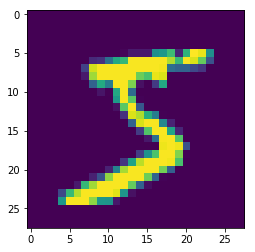

In [12]:
# show images
plt.imshow(X_train[0])

In [15]:
print('X: {}, Y: {}'.format(X_train.shape, y_train.shape))

X: (60000, 28, 28), Y: (60000,)


In [22]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [26]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [27]:
X_train /= 255
X_test /= 255

In [33]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [70]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # -> (None, 26, 26, 32)
model.add(layers.MaxPool2D(pool_size=(2, 2))) # -> (None, 13, 13, 32)
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
# model.add(layers.Conv2D(32, (3, 3), activation='relu')) # -> (None, 11, 11, 32)
# model.add(layers.MaxPool2D(pool_size=(2, 2))) # -> (None, 5, 5, 32)

print(model.output_shape)

(None, 10)


In [71]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 34s 563us/step - loss: 0.2816 - acc: 0.9140
Epoch 2/5
60000/60000 [==============================] - 36s 592us/step - loss: 0.1237 - acc: 0.9638
Epoch 3/5
60000/60000 [==============================] - 37s 613us/step - loss: 0.0967 - acc: 0.9707
Epoch 4/5
60000/60000 [==============================] - 36s 594us/step - loss: 0.0821 - acc: 0.9750
Epoch 5/5
60000/60000 [==============================] - 41s 687us/step - loss: 0.0710 - acc: 0.9784


In [77]:
model.evaluate(X_test, Y_test, verbose=True)

10000/10000 [==============================] - 1s 135us/step


[0.039689301973162221, 0.98629999999999995]

- model 1
  - [0.039689301973162221, 0.98629999999999995]
- model 2
  - Conv2D padding='valid' -> padding='same'
  - MaxPool (2, 2) -> pool_size=(4, 4)
  - [0.041303950931748844, 0.98609999999999998]
- model 3
  - Dense 128 -> 80
  - [0.046797603106207682, 0.9859]
- model 4
  - Dropout2 0.5 -> 0.25
  - [0.039060527089098469, 0.98819999999999997]
- model 5
  - Dropout2 0.25 -> none
  - [0.039307083108369258, 0.98719999999999997]
- model 6
  - Dropout1 0.25 -> none
  - [0.043636748189438364, 0.98680000000000001]
- model 7
  - Conv2D 32 -> 16
  - [0.054352130303904414, 0.98260000000000003]

'2.1.2'

In [100]:
model2 = Sequential()
model2.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same')) # -> (None, 28, 28, 32)
model2.add(layers.MaxPool2D(pool_size=(4, 4))) # -> (None, 7, 7, 32)
model2.add(layers.Flatten())
model2.add(layers.Dense(80, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

print(model2.output_shape)

(None, 10)


In [101]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
model2.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 15s 244us/step - loss: 0.2399 - acc: 0.9306
Epoch 2/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.0825 - acc: 0.9753
Epoch 3/5
60000/60000 [==============================] - 14s 240us/step - loss: 0.0625 - acc: 0.9811
Epoch 4/5
60000/60000 [==============================] - 14s 238us/step - loss: 0.0498 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 14s 236us/step - loss: 0.0425 - acc: 0.9869


In [103]:
model2.evaluate(X_test, Y_test, verbose=True)

10000/10000 [==============================] - 1s 119us/step


[0.054352130303904414, 0.98260000000000003]